<a href="https://colab.research.google.com/github/plaban1981/Mitra_AI/blob/main/Mitra_AI_Session_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_csv("/content/adult.csv")

## Metdata

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [30]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [29]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [40]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

## Histogram - distribyution of data

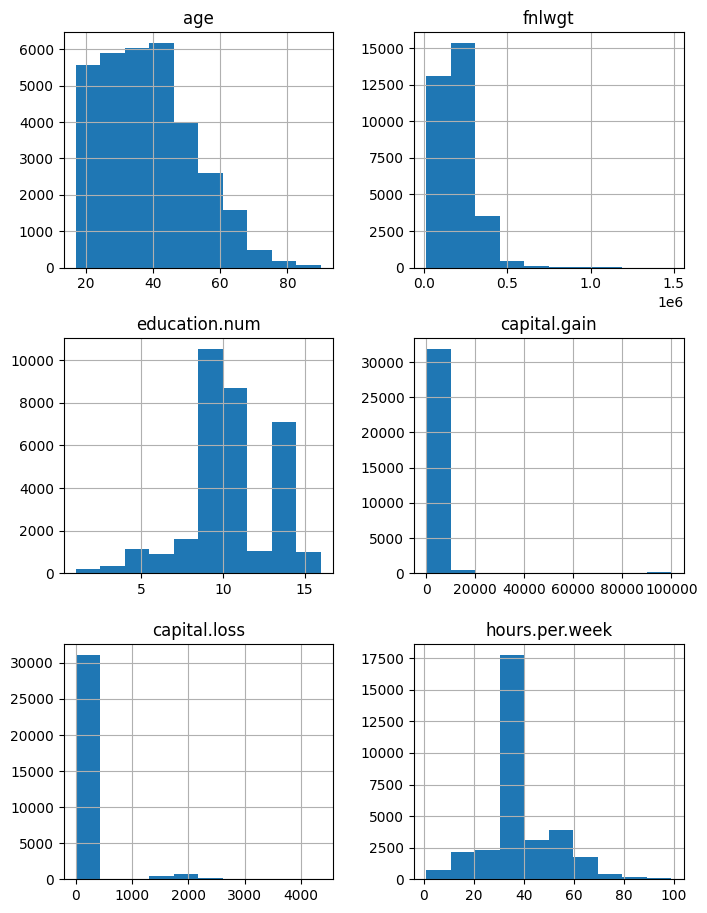

In [10]:
df.hist(figsize=(8,11))
plt.show()

In [41]:
def naive_predictor(row):
  if (row["race"] == "White") and (row["education"] == 'Masters') and (row["sex"] == 'Male') and (row["age"] >= 30):
    return ">=50k"
  else:
    return "<=50k"

In [43]:
score = 0
for index,row in df.iterrows():
  prediction = naive_predictor(row)
  if prediction == row["income"]:
    score +=1
print(score)
print(f"{(score/df.shape[0]) *100}%")

0
0.0%


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
  if df[col].dtype.kind in "fi":
    if df[col].isnull().any():
      df[col].fillna(df[col].median(),inplace=True)
  else:
    df[col] = encoder.fit_transform(df[col])

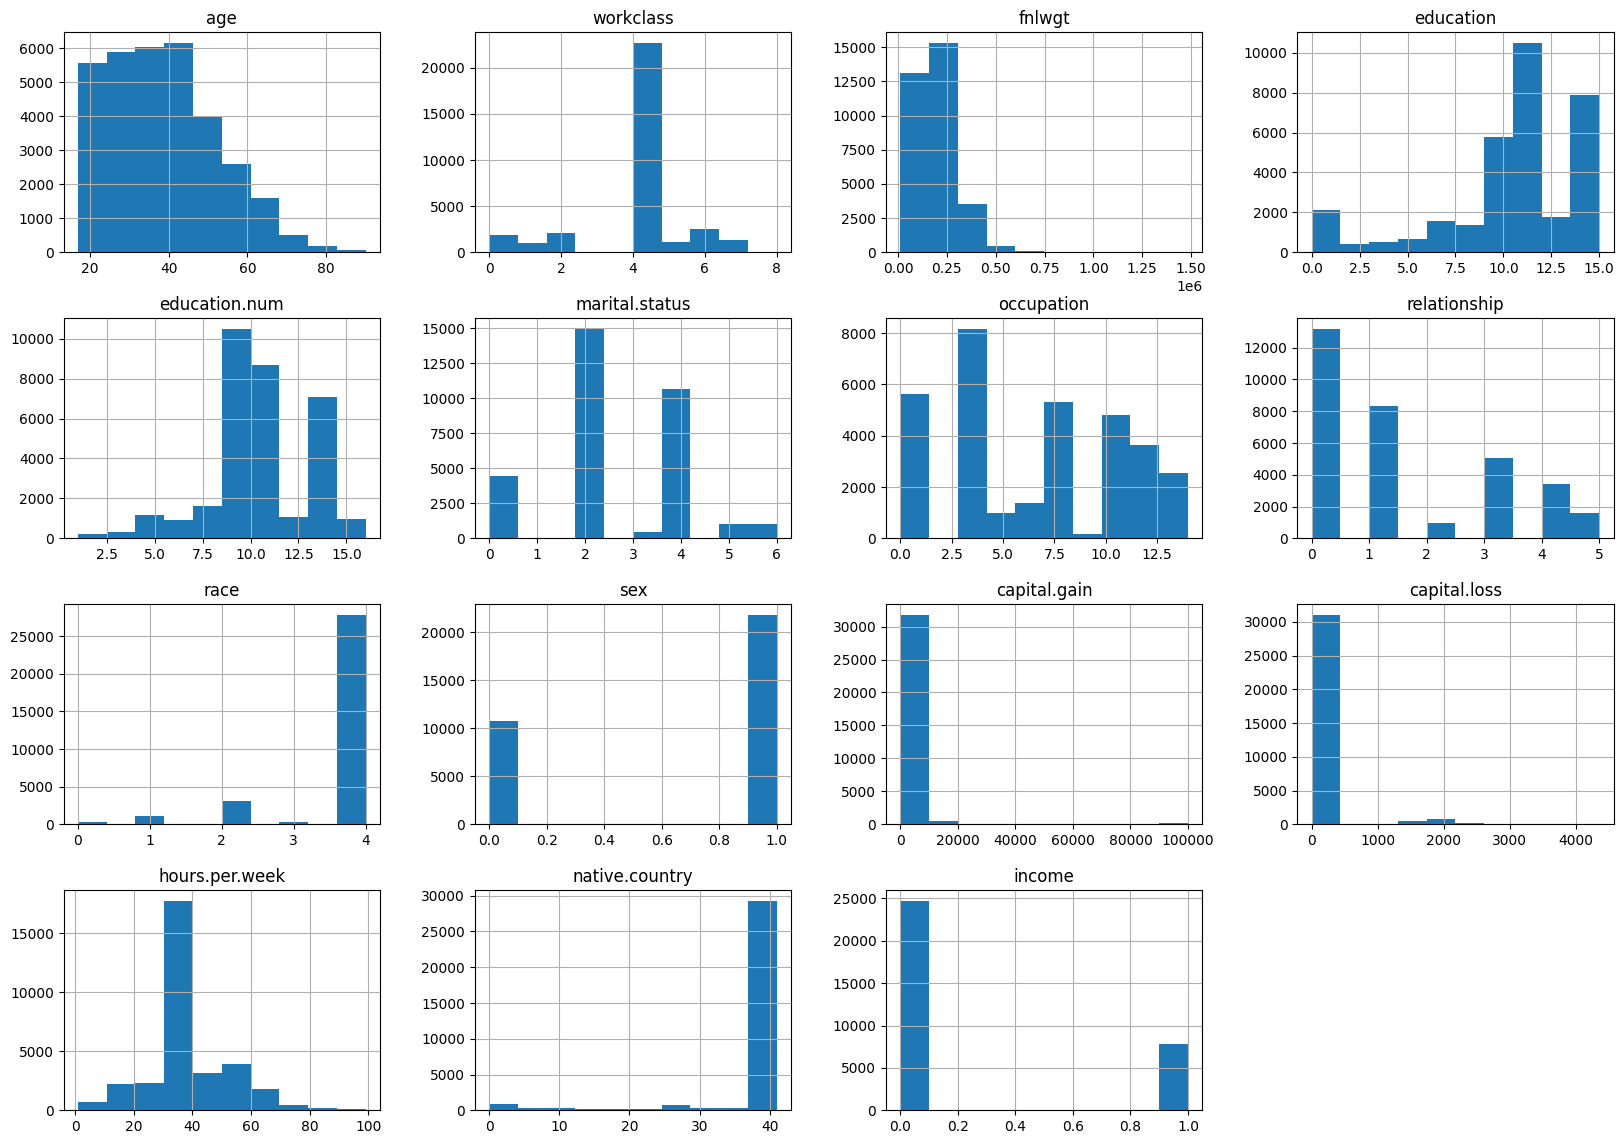

In [24]:
df.hist(figsize=(20,14))
plt.show()

## Corelation

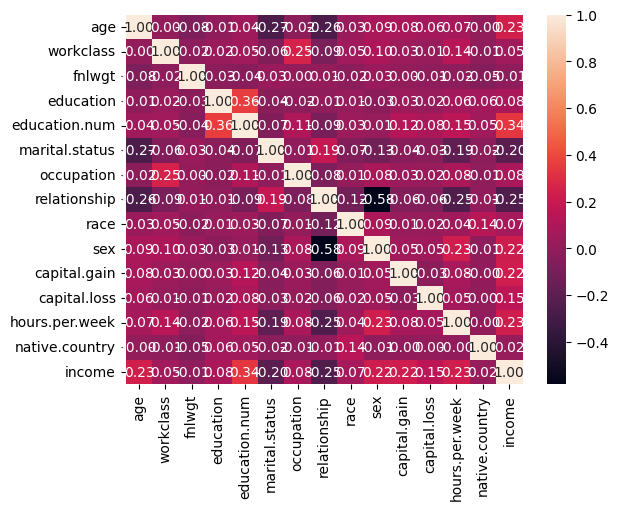

In [38]:
import seaborn as sns
_=sns.heatmap(df.corr(),fmt=".2f",annot=True)

## Segregate features and labels

In [45]:
y = df["income"]
x = df.drop("income",axis=1)
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39


## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,shuffle=True)

## Build Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier
trainer = KNeighborsClassifier()
trainer.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
trainer.score(X_test,y_test)

0.7754575604962536

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
rf.score(X_test,y_test)

0.8525979609384596

In [52]:
X_test.iloc[1]

age                   19
workclass              4
fnlwgt            439779
education             15
education.num         10
marital.status         4
occupation            12
relationship           3
race                   4
sex                    1
capital.gain           0
capital.loss           0
hours.per.week        15
native.country        39
Name: 27048, dtype: int64

In [56]:
prediction = rf.predict(X_test.iloc[[1]])
prediction

array([0])

In [58]:
X_test.iloc[[100]

SyntaxError: ignored

In [57]:
prediction = rf.predict(X_test.iloc[[100]])
prediction

array([0])

## Data Metrics